#data laoding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')


In [ ]:
df=pd.read_csv('/archive.zip')
df.head()


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


#eda

In [ ]:
df

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,27,12,2024,0,5,58.43,249.17,41.69,65.89,0.99,36.25,263
1457,28,12,2024,0,6,33.83,150.77,33.31,66.14,0.79,35.19,113
1458,29,12,2024,1,7,31.21,139.75,27.01,65.94,0.57,35.88,142
1459,30,12,2024,0,1,38.01,152.83,29.12,65.16,0.55,38.38,116


In [ ]:
df.columns


Index(['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10',
       'NO2', 'SO2', 'CO', 'Ozone', 'AQI'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [ ]:
df.isnull().sum()


,0
Date,0
Month,0
Year,0
Holidays_Count,0
Days,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0


In [ ]:
df.describe()


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


In [ ]:
df.corr()


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
Date,1.000000,0.010522,0.001384,0.019424,0.001487,0.020023,0.011082,0.008788,0.044515,0.033665,-0.010748,-0.001057
Month,0.010522,1.000000,-0.001204,0.002100,0.002824,-0.074140,0.046479,0.082342,0.142763,0.081195,-0.102716,-0.034169
Year,0.001384,-0.001204,1.000000,0.008144,-0.002600,-0.254641,0.034936,-0.078301,0.612480,-0.202139,0.092638,-0.083563
Holidays_Count,0.019424,0.002100,0.008144,1.000000,0.514644,-0.008869,-0.016789,-0.005577,0.008760,-0.003863,0.007388,0.000447
Days,0.001487,0.002824,-0.002600,0.514644,1.000000,0.006395,-0.024105,0.018301,-0.009367,0.000779,0.022247,0.002113
PM2.5,0.020023,-0.074140,-0.254641,-0.008869,0.006395,1.000000,0.721745,0.245283,-0.082946,0.690090,-0.159882,0.801960
PM10,0.011082,0.046479,0.034936,-0.016789,-0.024105,0.721745,1.000000,0.270478,0.131045,0.647241,-0.152054,0.899421
NO2,0.008788,0.082342,-0.078301,-0.005577,0.018301,0.245283,0.270478,1.000000,0.057626,0.329214,-0.155068,0.319261
SO2,0.044515,0.142763,0.612480,0.008760,-0.009367,-0.082946,0.131045,0.057626,1.000000,-0.068631,0.188534,0.036288
CO,0.033665,0.081195,-0.202139,-0.003863,0.000779,0.690090,0.647241,0.329214,-0.068631,1.000000,-0.199935,0.696809


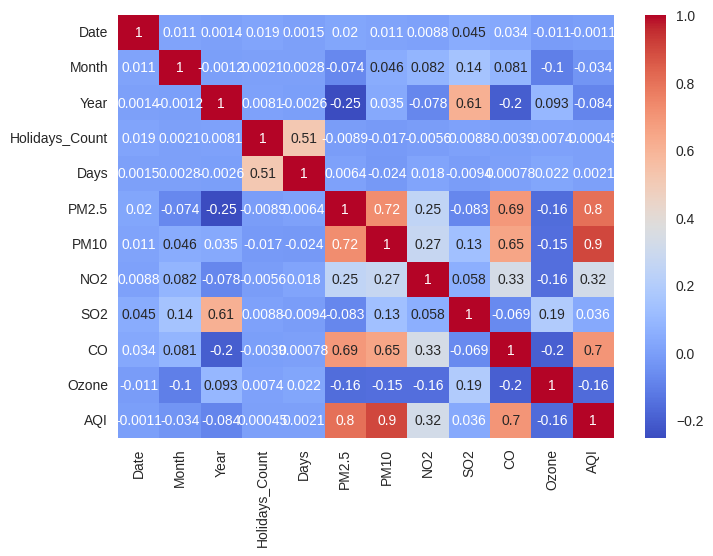

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()


In [ ]:
df['Year'].unique()

array([2021, 2022, 2023, 2024])

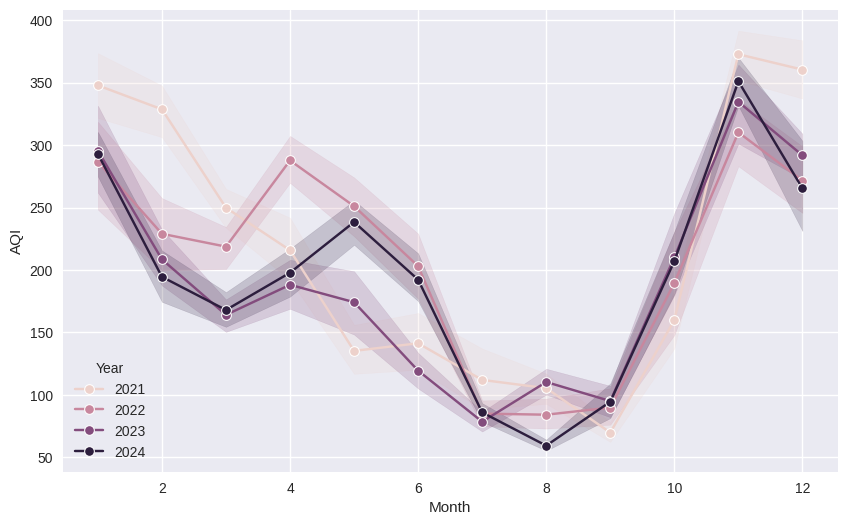

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Month',y='AQI',hue='Year',data=df,marker='o')
plt.show()


/tmp/ipython-input-620274589.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Month',y='AQI',hue='Year',data=df,ci=None)


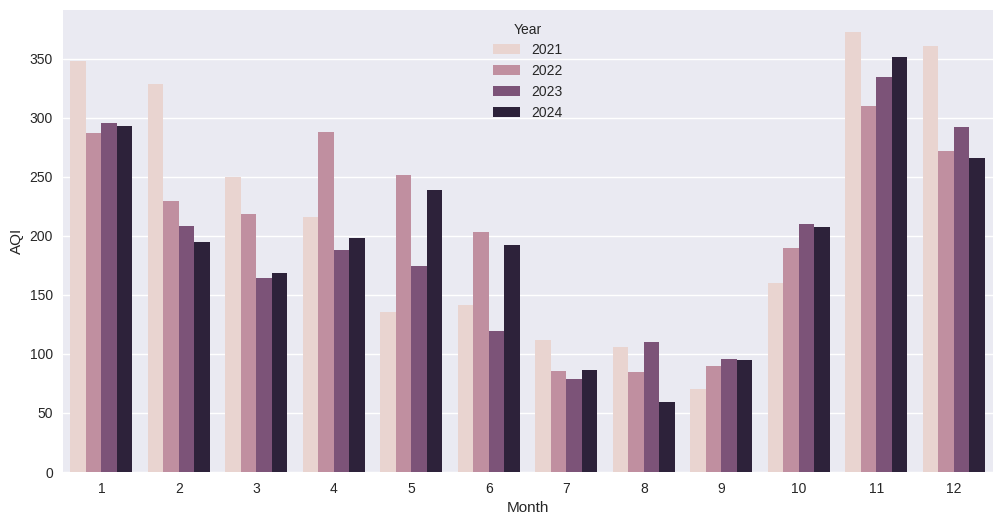

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Month',y='AQI',hue='Year',data=df,ci=None)
plt.show()


In [ ]:
df['Days'].unique()


array([5, 6, 7, 1, 2, 3, 4])

/tmp/ipython-input-2179286100.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date',y='AQI',hue='Year',data=d,marker='o',ci=None)


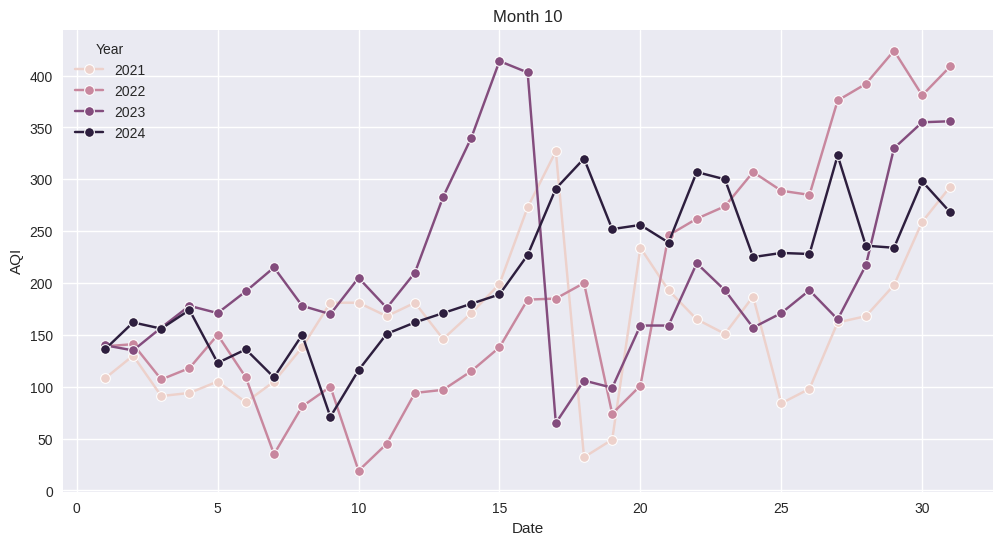

/tmp/ipython-input-2179286100.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date',y='AQI',hue='Year',data=d,marker='o',ci=None)


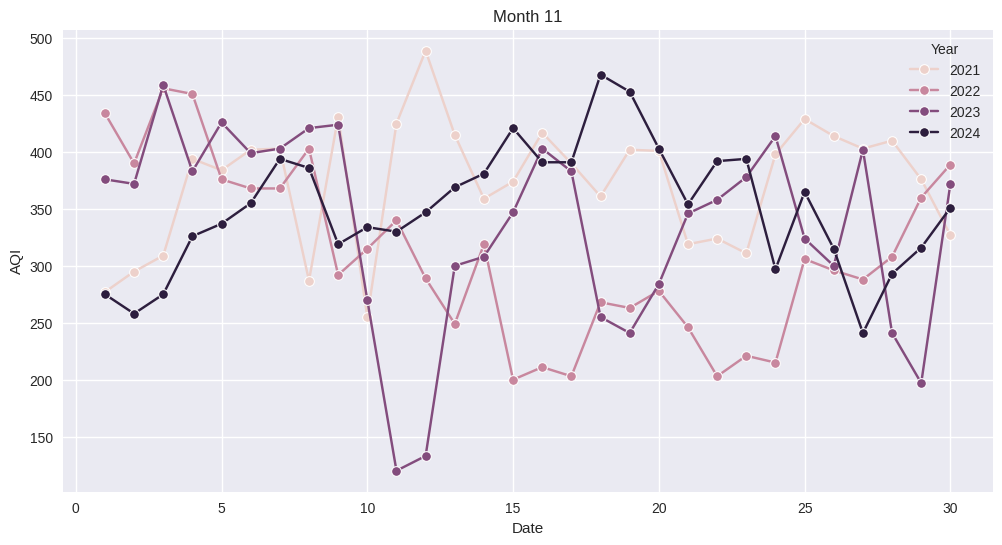

/tmp/ipython-input-2179286100.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date',y='AQI',hue='Year',data=d,marker='o',ci=None)


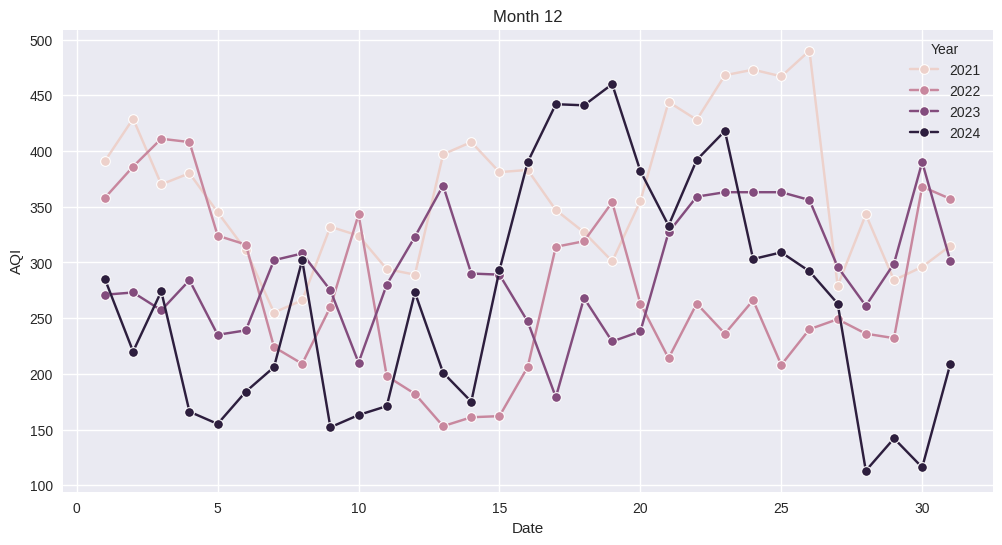

/tmp/ipython-input-2179286100.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date',y='AQI',hue='Year',data=d,marker='o',ci=None)


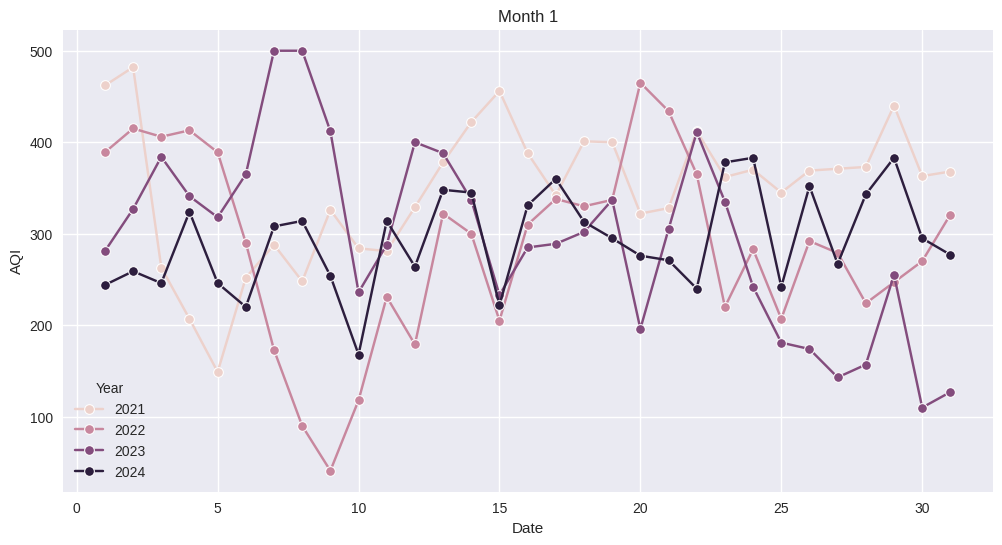

/tmp/ipython-input-2179286100.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date',y='AQI',hue='Year',data=d,marker='o',ci=None)


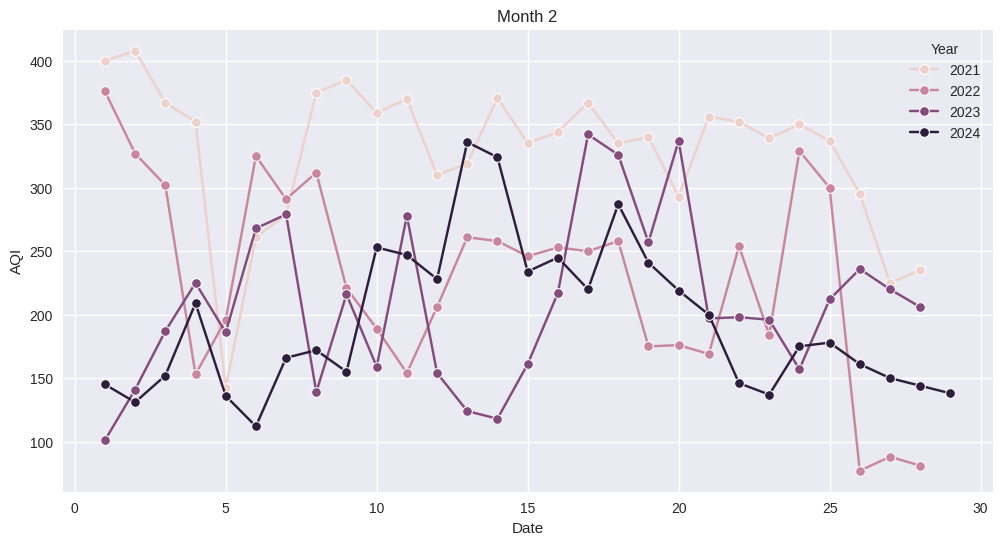

In [ ]:
for m in [10,11,12,1,2]:
    d=df[df['Month']==m]
    plt.figure(figsize=(12,6))
    sns.lineplot(x='Date',y='AQI',hue='Year',data=d,marker='o',ci=None)
    plt.title(f'Month {m}')
    plt.show()


/tmp/ipython-input-3411947186.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month',y='AQI',hue='Year',data=g,marker='o',ci=None)


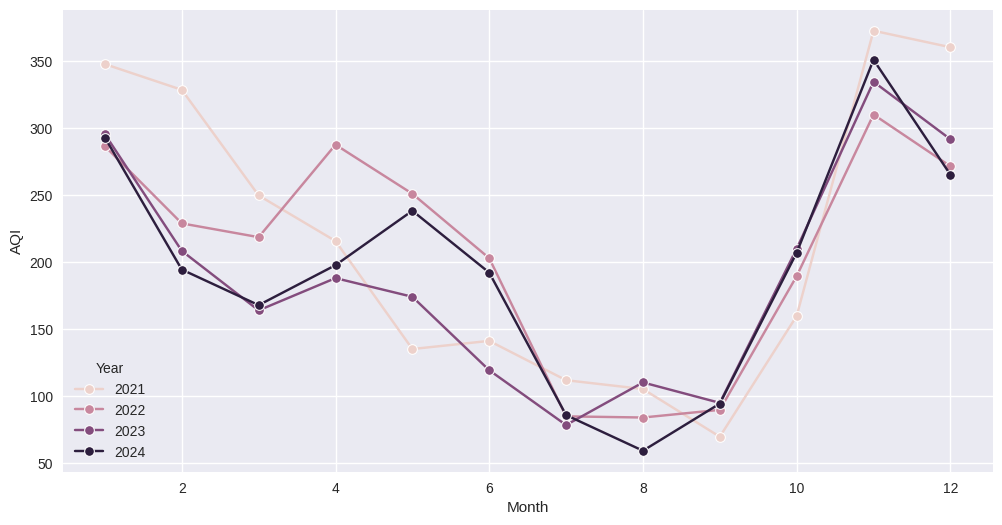

In [ ]:
g=df.groupby(['Year','Month'])['AQI'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Month',y='AQI',hue='Year',data=g,marker='o',ci=None)
plt.show()


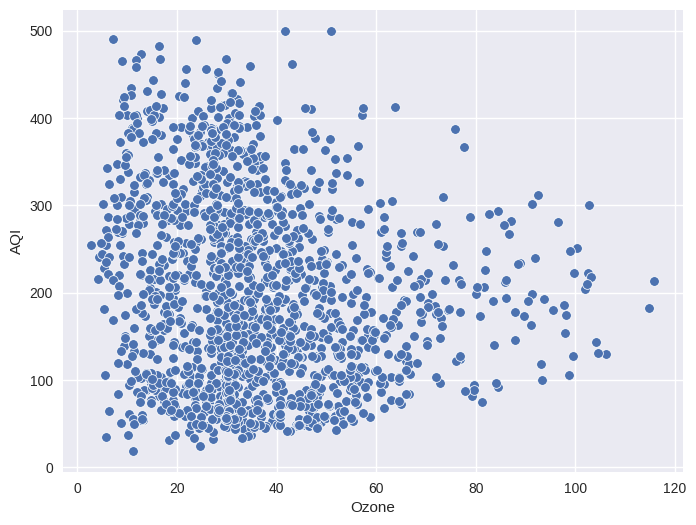

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Ozone',y='AQI',data=df)
plt.show()


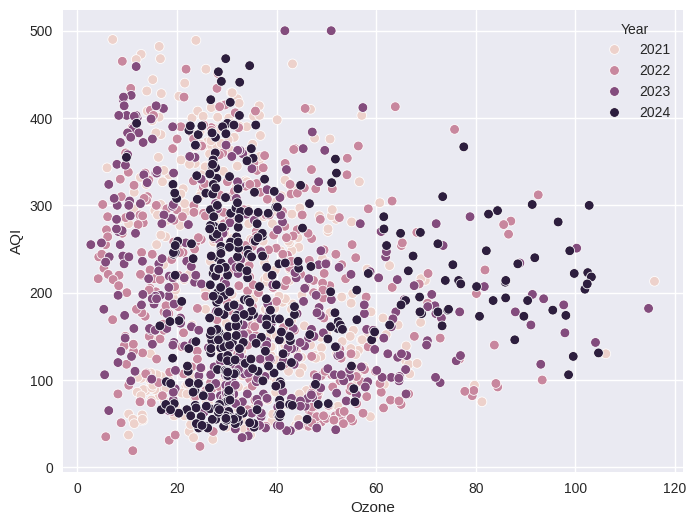

In [ ]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='Ozone',y='AQI',hue='Year',data=df)
plt.show()


/tmp/ipython-input-3931337962.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month',y='PM2.5',hue='Year',data=g1,marker='o',ci=None)


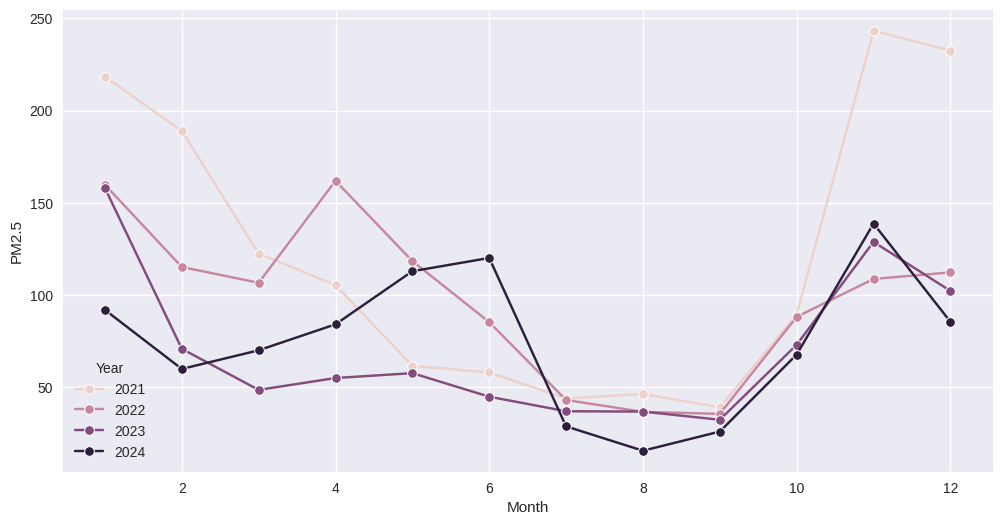

/tmp/ipython-input-3931337962.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month',y='PM10',hue='Year',data=g2,marker='o',ci=None)


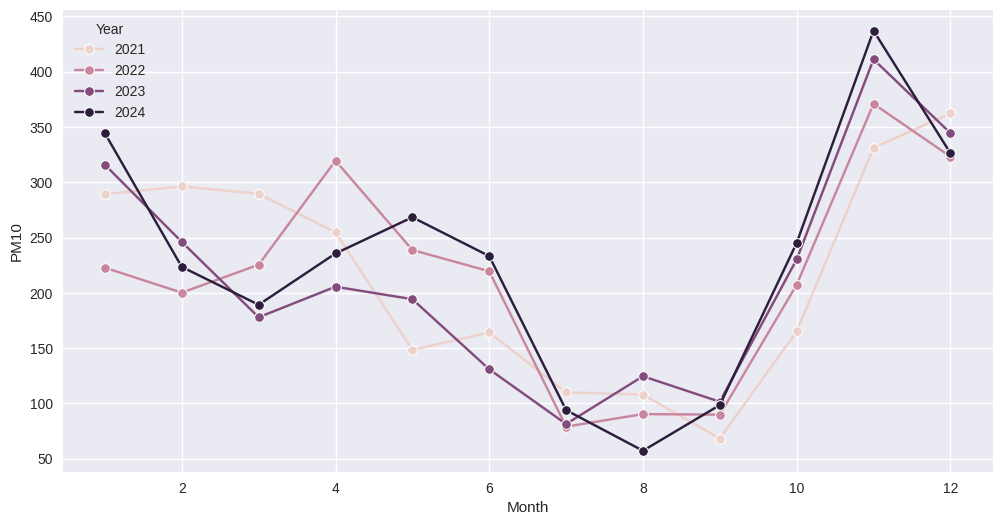

In [ ]:
g1=df.groupby(['Year','Month'])['PM2.5'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Month',y='PM2.5',hue='Year',data=g1,marker='o',ci=None)
plt.show()

g2=df.groupby(['Year','Month'])['PM10'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Month',y='PM10',hue='Year',data=g2,marker='o',ci=None)
plt.show()


/tmp/ipython-input-329732258.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month',y='NO2',hue='Year',data=g1,marker='o',ci=None)


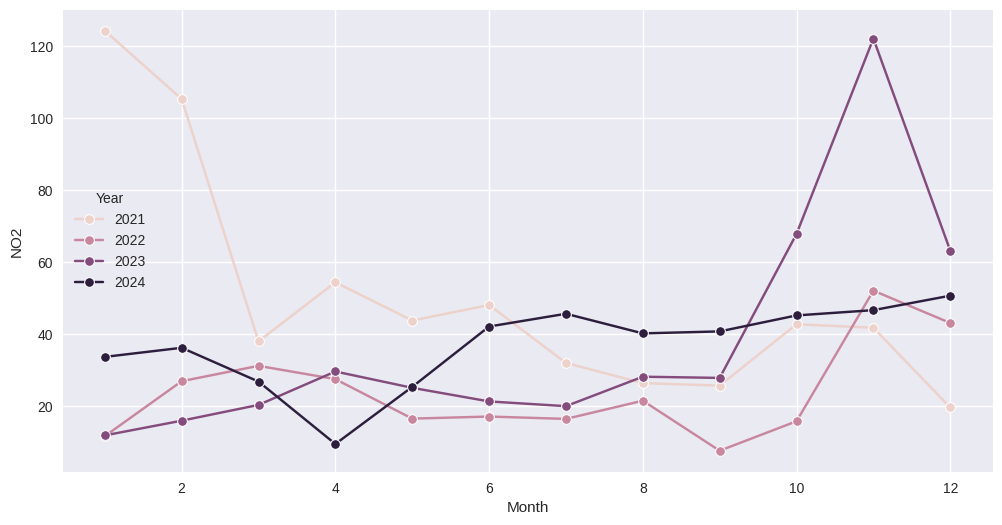

In [ ]:
g1=df.groupby(['Year','Month'])['NO2'].mean().reset_index()
plt.figure(figsize=(12,8))
sns.lineplot(x='Month',y='NO2',hue='Year',data=g1,marker='o',ci=None)
plt.show()


/tmp/ipython-input-158246392.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month',y='PM2.5',hue='Year',data=g2,marker='o',ci=None)


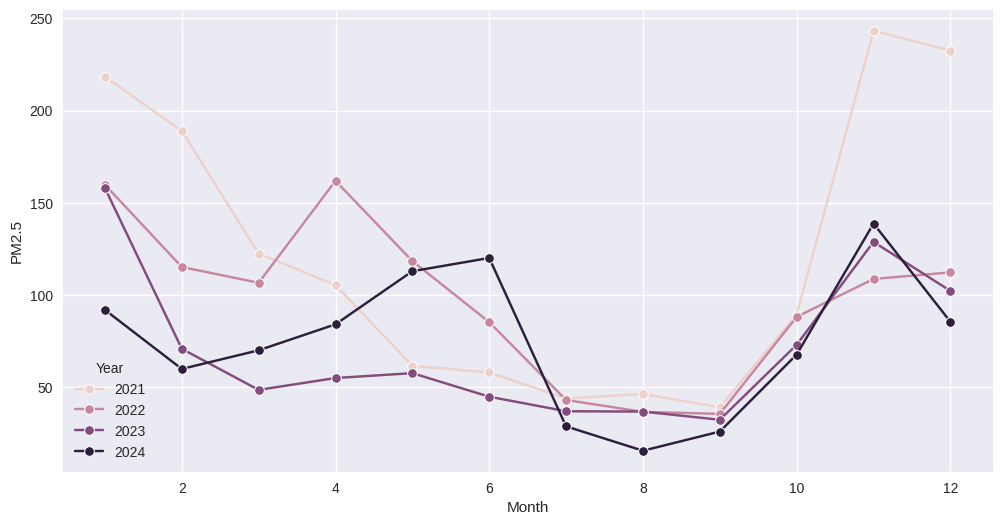

/tmp/ipython-input-158246392.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month',y='CO',hue='Year',data=g2,marker='o',ci=None)


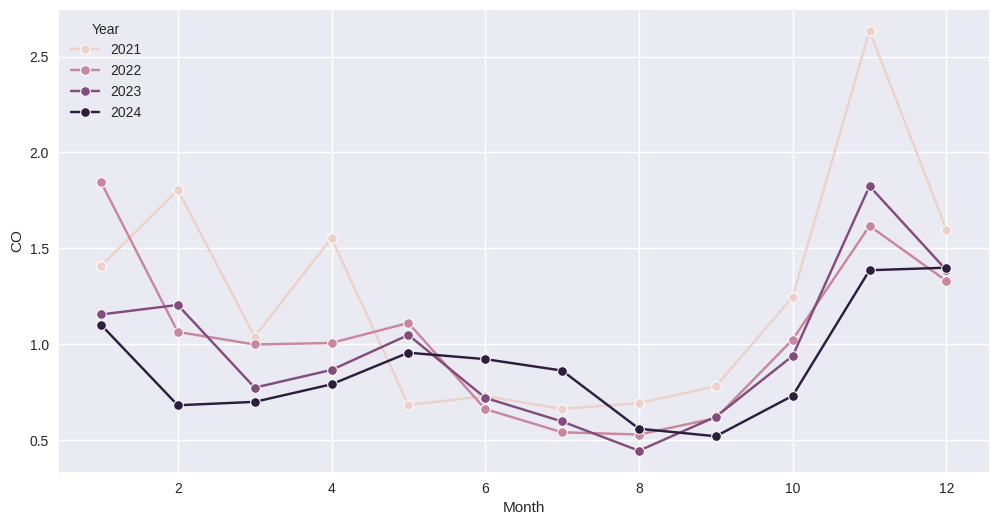

/tmp/ipython-input-158246392.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month',y='SO2',hue='Year',data=g2,marker='o',ci=None)


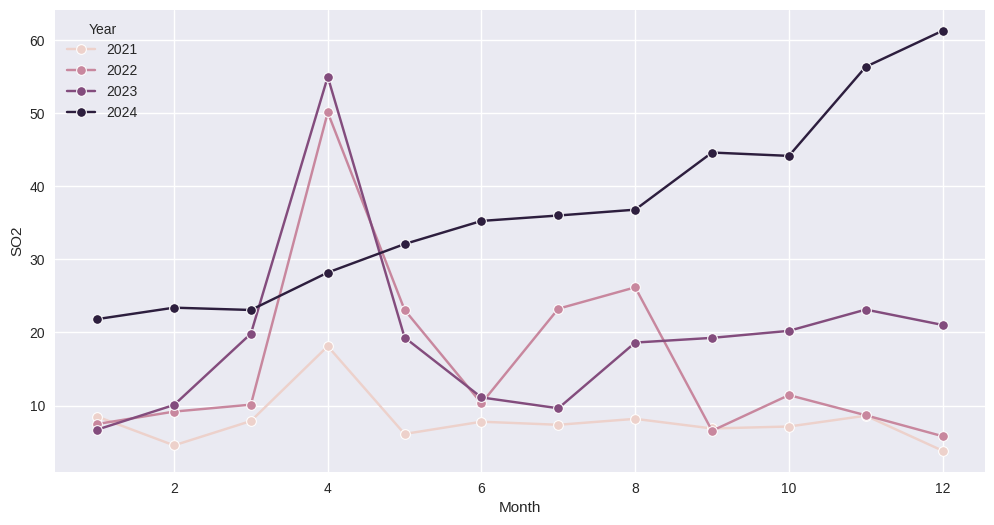

In [ ]:
g2=df.groupby(['Year','Month'])['PM2.5'].mean().reset_index()
plt.figure(figsize=(12,7))
sns.lineplot(x='Month',y='PM2.5',hue='Year',data=g2,marker='o',ci=None)
plt.show()

g2=df.groupby(['Year','Month'])['CO'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Month',y='CO',hue='Year',data=g2,marker='o',ci=None)
plt.show()

g2=df.groupby(['Year','Month'])['SO2'].mean().reset_index()
plt.figure(figsize=(12,7))
sns.lineplot(x='Month',y='SO2',hue='Year',data=g2,marker='o',ci=None)
plt.show()